<h1 style="color: #808000;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #A3A35C;">Main Libraries</h1>

In [3]:
#Cleaning and numerical libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="color: #A3A35C;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #5B8000;">Data Loading</h3>

In [6]:
df1 = pd.read_csv(r"C:\Users\HP\Desktop\Ironhack\Projects\Portfolio_Analysis\asset_price_data.csv")

In [7]:
df1.head()

date    Asset1  Asset2     Asset3  Asset4  Asset5
0  2019-01-02  231.5061  55.875  25.649222  302.93   50.89
1  2019-01-03  231.0356  54.977  25.503047  302.11   50.41
2  2019-01-04  230.4026  56.129  26.147133  301.77   51.38
3  2019-01-07  230.0543  56.838  25.955277  302.33   52.14
4  2019-01-08  229.7012  56.895  26.137997  303.42   52.13

In [8]:
df1.shape

(783, 6)

In [120]:
df_prices = df1.copy()

In [122]:
#Transforming column date into datetime format so that we can set it as a dateIndex
df_prices["date"] = pd.to_datetime(df_prices["date"]) 

In [124]:
#Setting "date" column as the index
df_prices.set_index("date", inplace=True)  

In [126]:
df_prices

Asset1   Asset2     Asset3  Asset4  Asset5
date                                                    
2019-01-02  231.5061   55.875  25.649222  302.93   50.89
2019-01-03  231.0356   54.977  25.503047  302.11   50.41
2019-01-04  230.4026   56.129  26.147133  301.77   51.38
2019-01-07  230.0543   56.838  25.955277  302.33   52.14
2019-01-08  229.7012   56.895  26.137997  303.42   52.13
...              ...      ...        ...     ...     ...
2021-12-27  249.9207  103.956  38.820000     NaN   70.11
2021-12-28  249.9368  104.526  39.115000     NaN   70.03
2021-12-29  248.7215  104.360  38.855000  342.46   69.81
2021-12-30  248.5485  104.663  38.985000  342.55   69.91
2021-12-31  248.7545  104.106  39.005000  342.59     NaN

[783 rows x 5 columns]

In [138]:
#We divide all the values from the dataframe by the first value in each column so that they all have the same starting point:1. This way we can compare their trends properly.
df_prices_normalized = df_prices/df_prices.iloc[0]

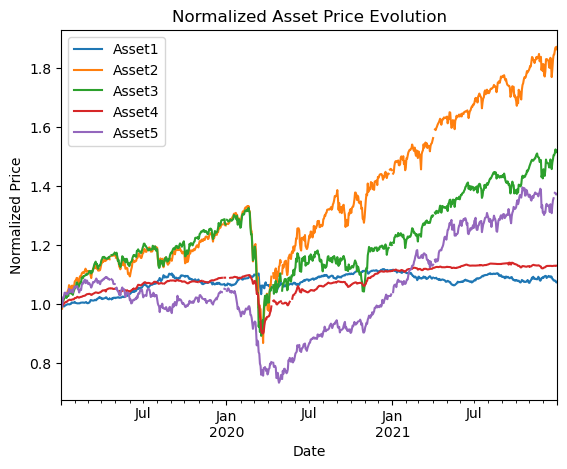

In [154]:
#Plotting time series graph
df_prices_normalized.plot()
plt.title('Normalized Asset Price Evolution')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.show()

#### Insights:
- Given the hard falls of Asset2, Asset3 and Asset5 in the begginnig of the Covid-19 pandemic and its afterwards steep recovery we could infer that they seem to be riskier assets, more prone to volatility.
- On the other hand, Asset1 seems to present a solid flat trend, in other words, seems to be stable and close to 0 risk.

<h1 style="color: #A3A35C;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #5B8000;">Daily Returns Calculation</h2>

In [11]:
df1_returns = df1.copy()

In [12]:
#Checking Nan values
df1_returns.isna().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

In [13]:
#Checking duplicates
df1_returns.duplicated().sum()

0

In [14]:
#Filling all NaN values with the the last valid observation in each column.
df1_returns = df1_returns.fillna(method='ffill')

C:\Users\HP\AppData\Local\Temp\ipykernel_848\2157764224.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1_returns = df1_returns.fillna(method='ffill')


In [15]:
#Checking again Nan existing
df1_returns.isna().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

In [16]:
#The method pct_change(1) provides us a straightfoward solution to get daily returns of the considered assets
def daily_percentage_returns(data):
    data = data.pct_change(1) * 100
    return data

In [17]:
#Applying the formula in each asset
for x in range(1,6):
    df1_returns[f"Asset{x}"] = daily_percentage_returns(df1_returns[f"Asset{x}"])

In [18]:
df1_returns

date    Asset1    Asset2    Asset3    Asset4    Asset5
0    2019-01-02       NaN       NaN       NaN       NaN       NaN
1    2019-01-03 -0.203234 -1.607159 -0.569902 -0.270690 -0.943211
2    2019-01-04 -0.273984  2.095422  2.525524 -0.112542  1.924221
3    2019-01-07 -0.151170  1.263162 -0.733753  0.185572  1.479175
4    2019-01-08 -0.153486  0.100285  0.703977  0.360533 -0.019179
..          ...       ...       ...       ...       ...       ...
778  2021-12-27 -0.091306  0.738415  0.543901  0.000000  1.344319
779  2021-12-28  0.006442  0.548309  0.759918  0.000000 -0.114106
780  2021-12-29 -0.486243 -0.158812 -0.664707  0.017523 -0.314151
781  2021-12-30 -0.069556  0.290341  0.334577  0.026280  0.143246
782  2021-12-31  0.082881 -0.532184  0.051302  0.011677  0.000000

[783 rows x 6 columns]

In [19]:
df_new_returns = df1_returns.copy()

In [20]:
#Final returns df without any NaN values
df_new_returns.dropna(inplace=True)

<h2 style="color: #5B8000;">Correlation Matrix Calculation</h2>


In [22]:
#Creating a df that only contains numerical variables, in other words only asset columns
num = df_new_returns.select_dtypes(include="number") 

In [23]:
correlation_matrix = num.corr()

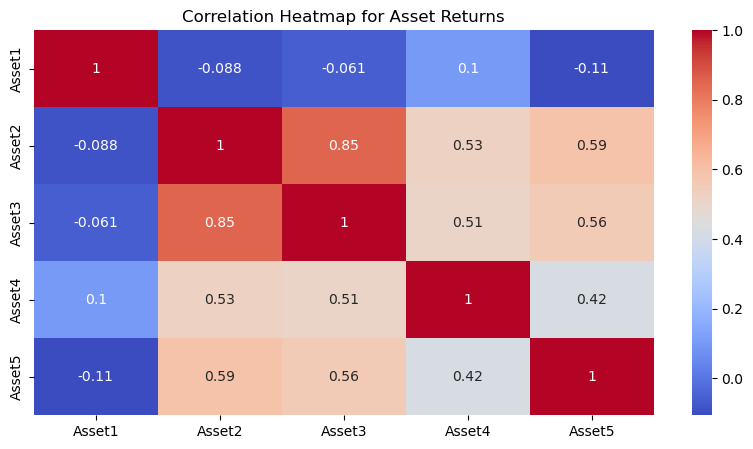

In [24]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 5))

# Drawing the heatmap for the numerical columns (assets)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Asset Returns")
plt.show()

#### Insights: 
- From the heatmap we can spot a strong positive correlation between Asset2 and Asset3 (+ 0,85) which supports the idea that they present similar risk levels and market trends.

<h2 style="color: #5B8000;">Scatter Plot between the Returns of Two Assets.</h2>

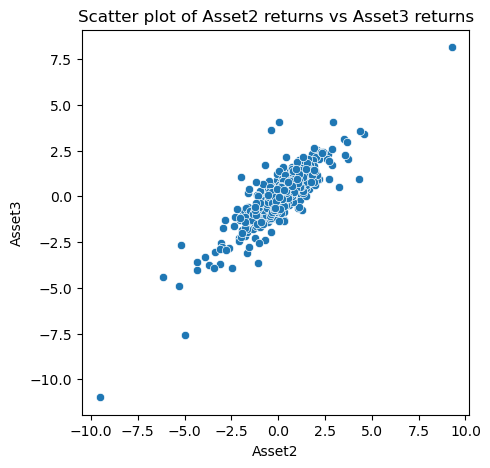

In [162]:
plt.figure(figsize=(5, 5))
plt.title("Scatter plot of Asset2 returns vs Asset3 returns")
sns.scatterplot(data=num, x="Asset2", y="Asset3")
plt.show()

#### Insights: 
- As spotted before in the correlation matrix, from the scatter plot we can confirm the existence of relevant relationship between Asset2 and the remain Asset3.

<h1 style="color: #A3A35C;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

In [30]:
df_weights = pd.read_csv(r"C:\Users\HP\Desktop\Ironhack\Projects\Portfolio_Analysis\portfolio_weights.csv")

In [31]:
df_weights.shape

(783, 6)

In [32]:
df_weights.head()

date    Asset1    Asset2    Asset3   Asset4    Asset5
0  2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
1  2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2  2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
3  2019-01-07  0.225458  0.116255  0.265003  0.23031  0.162974
4  2019-01-08  0.225458  0.116255  0.265003  0.23031  0.162974

In [33]:
df_weights_new = df_weights.copy()

In [34]:
#Transforming column date into datetime format so that we can set it as a dateIndex
df_weights_new["date"] = pd.to_datetime(df_weights_new["date"]) 

In [35]:
#Setting "date" column as the index
df_weights_new.set_index("date", inplace=True)  

In [36]:
df_weights_new.head()

Asset1    Asset2    Asset3   Asset4    Asset5
date                                                       
2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-07  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-08  0.225458  0.116255  0.265003  0.23031  0.162974

<h2 style="color: #5B8000;">Area Chart of Asset Weights</h2>

- Create an area chart of the asset weights.

In [38]:
#Transforming daily weight records into quarterly weight records using quarter means 
#This will be helpful better vizualize the area chart
df_weights_quarter = df_weights_new.resample('Q').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_848\2643025725.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_weights_quarter = df_weights_new.resample('Q').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

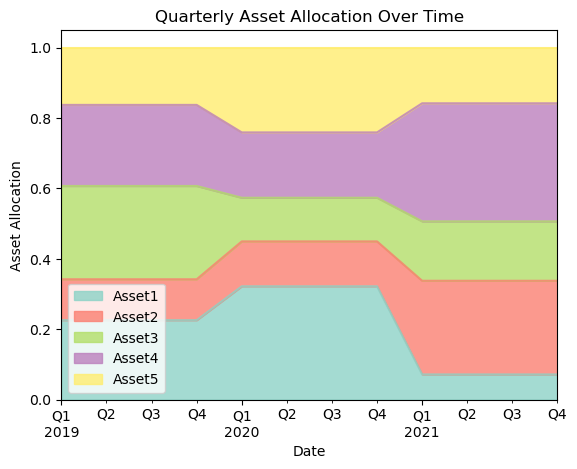

In [39]:
# Plotting the area chart
plt.figure(figsize=(12, 6))
df_weights_quarter.plot.area(stacked=True, alpha=0.8, cmap='Set3') 
plt.xlabel('Date')
plt.ylabel('Asset Allocation')
plt.title('Quarterly Asset Allocation Over Time')
plt.show

#### Insights: 
- From the area chart we can spot that Asset1, during 2020 pandemic difficluties, became the most significant asset within the analysed portfolio. Once again this financial choice could be related to its lower risk and more stable characteristics. Investors are prone to lower risk and more liquid assets when facing economic difficulties.

<h2 style="color: #5B8000;">Chart of Historical Cumulative Returns of the Portfolio</h2>

- Plot the historical cumulative returns of the portfolio.

In [41]:
## Adapted from https://www.codingfinance.com/post/2018-04-10-cumulative-portfolio-returns-py/

In [42]:
#Creating a copy from the final percentage daily returns dataframe from Exercise 2.
df_returns_new = df_new_returns.copy() 

In [43]:
#Setting date column as datetimeIndex so that it is comparable to df_weights_new
df_returns_new["date"] = pd.to_datetime(df_returns_new["date"])
df_returns_new.set_index("date", inplace=True)

In [44]:
 #Retrieving decimal values instead of percentage daily returns so that we can do further calculations
df_returns_new = df_returns_new/100

In [45]:
# Creating a new df with daily returns times daily weights
df_returns_weight = df_returns_new * df_weights_new.iloc[1:]

In [46]:
#Adding the rows to get the portfolio return for each day
port_ret = df_returns_weight.sum(axis=1) 

In [47]:
#Calculating cumulative returns over time 
cumulative_ret = (1 + port_ret ).cumprod() - 1 

In [48]:
#Retrieving cumulative returns in percentage
cumulative_ret_percentage = cumulative_ret * 100 

<function matplotlib.pyplot.show(close=None, block=None)>

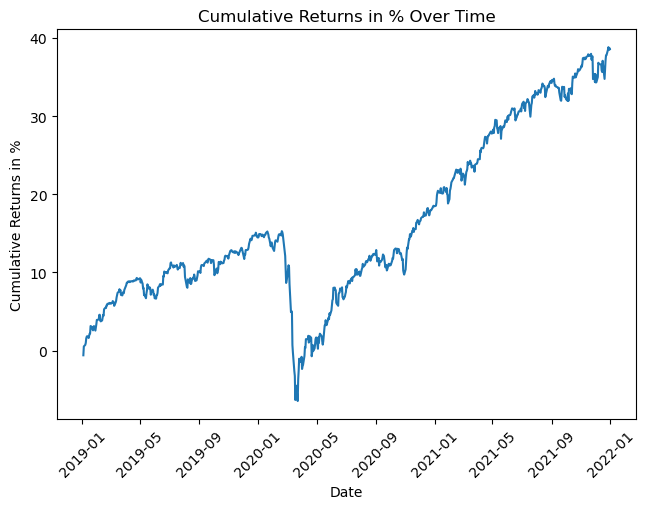

In [49]:
plt.plot(cumulative_ret_percentage)
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Cumulative Returns in %')
plt.title('Cumulative Returns in % Over Time')
plt.show

#### Insights: 
- From the timeseries we can spot a significant fall after the begginning of the Covid-19 pandemic in March 2020. Afterwards, with the economic recovery, markets and businesses faced a positive improvement, which made this specific portfolio achieve almost 40% of cumulative return from january 2019 until the end of 2021.

<h2 style="color: #5B8000;">Annualized Return</h2>

- Calculate the annualized return of the portfolio.

In [51]:
#Adapted from https://plainenglish.io/blog/calculating-annualized-expected-stock-returns-using-python-aaba430ca8a9

In [52]:
#Total cumulative return (last row value)
cumulative_ret_total = cumulative_ret.iloc[-1] 

In [53]:
#Number of years considered in the data 
num_years = 3

In [54]:
#Annualized return formula
annualized_return = (1 + cumulative_ret_total) ** (1 / num_years) - 1 
annualized_return = annualized_return * 100
print(f"Annualized Return: {annualized_return:.2f}%")

Annualized Return: 11.49%


<h2 style="color: #5B8000;">Annualized Volatility</h2>

- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).

In [56]:
#Daily volatility calculation to use afterwards
daily_volatility = port_ret.std()

In [57]:
#Annualized volatility formula
annualized_volatility = daily_volatility * np.sqrt(261)
annualized_volatility = annualized_volatility * 100
print(f"Annualized Volatility: {annualized_volatility:.2f}%")

Annualized Volatility: 8.51%


<h2 style="color: #5B8000;">Area Chart of Asset Weights Grouped by Family</h2>

- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [59]:
df_categories = pd.read_csv(r"C:\Users\HP\Desktop\Ironhack\Projects\Portfolio_Analysis\asset_information_data.csv")

In [60]:
df_categories.shape

(5, 2)

In [61]:
df_categories.head()

Name        Family
0  Asset1  Fixed Income
1  Asset2  Fixed Income
2  Asset3        Equity
3  Asset4        Equity
4  Asset5   Alternative

In [62]:
#Creating a copy from the final daily asset weights df
df_weights_categories = df_weights_new.copy()

In [63]:
#Creating 3 new category columns by grouping assets into each one
df_weights_categories["Fixed Income"] = df_weights_categories["Asset1"] + df_weights_categories["Asset2"]
df_weights_categories["Equity"] = df_weights_categories["Asset3"] + df_weights_categories["Asset4"]
df_weights_categories["Alternative"] = df_weights_categories["Asset5"]

In [64]:
#Dropping asset columns not needed
df_weights_categories = df_weights_categories.drop(columns = {"Asset1", "Asset2", "Asset3", "Asset4", "Asset5"})

In [65]:
df_weights_categories

Fixed Income    Equity  Alternative
date                                           
2019-01-02      0.341713  0.495313     0.162974
2019-01-03      0.341713  0.495313     0.162974
2019-01-04      0.341713  0.495313     0.162974
2019-01-07      0.341713  0.495313     0.162974
2019-01-08      0.341713  0.495313     0.162974
...                  ...       ...          ...
2021-12-27      0.337400  0.504245     0.158356
2021-12-28      0.337400  0.504245     0.158356
2021-12-29      0.337400  0.504245     0.158356
2021-12-30      0.337400  0.504245     0.158356
2021-12-31      0.337400  0.504245     0.158356

[783 rows x 3 columns]

In [66]:
#Again, transforming daily weight records into quarterly weight records using quarter means
#This will be helpful better vizualize the area chart
df_weights_categories_quarter = df_weights_categories.resample('Q').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_848\3094697530.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_weights_categories_quarter = df_weights_categories.resample('Q').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

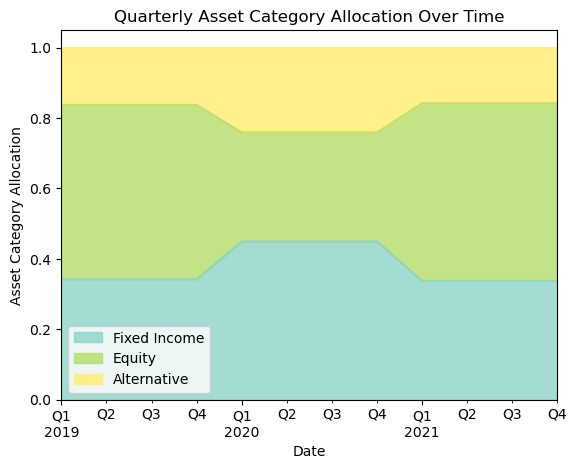

In [67]:
# Plotting the area chart
plt.figure(figsize=(12, 6))
df_weights_categories_quarter.plot.area(stacked=True, alpha=0.8, cmap='Set3') 
plt.xlabel('Date')
plt.ylabel('Asset Category Allocation')
plt.title('Quarterly Asset Category Allocation Over Time')
plt.show

#### Insights: 
- As spotted before, it is confirmed that fixed income assets, which in general are characterized by lower risk assets, as bonds for example, had a significant weight within the analysed portfolio during the first months of the Covid-19 pandemic (2020), where investors are prone to have more liquid assets.